#  10장 . 그래프 탐색(순회)
### 본 실습에서는 그래프 의 각 노드를 순회하는 알고리즘을 살펴 봅시다. 그래프 순회는 깊이우선(Depth First) 와 너비우선(Width First) 알고리즘들이 있습니다.
![alt text](fig12-DFS_BFS.jpg)
![alt text](fig12-DFS_WFS.jpg)
#### 그래프 탐색들은 순회하여 보면 트리 탐색으로 구성됩니다 ([그림 1] 과 [그림 2], [그림 3] 비교). 

## 1. 그래프 깊이 우선 및 너비 우선 탐색
####  11주 실습에서 살펴보았던 다음 [그림1 ] 의 그래프에 대해 깊이우선탐색, 너비우선탐색에 대해 살펴보기로 합니다. 
![alt text](fig12-1.png)

#### 상기  [그림1]의  그래프에 대해, 그래프 표현은 이미 학습한대로  adjacency list 를 사용하며, 파이썬에서는 이를 dictionary 로 다음과 같이 표현합니다.

In [19]:
graph1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N'],}
graph1

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

<br/>

## 깊이우선탐색 (Depth First Search)

#### 그래프의 연결된 노드들에 대한 깊이우선탐색에 대한  의사코드(pseudo-code)는 아래와 같습니다. 

~~~python
DFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    for every edge (s, v):
       if v unexplored:
          DFS(G, v)
~~~

### 다음은 깊이우선탐색에 의한 그래프 모든 노드의 탐색(순회) 파이썬 알고리즘 구현입니다. 

In [20]:
def dfs(graph, start,explored=[]):  #graph ; 인접 노드 목록 그래프 표현, #start ;  시작 노드, explored=탐색된 노드 리스트
    if not start in graph: #시작노드가 그래프 노드 가 아니면 문제 있음 
        return None
   
    if start in explored: # (1) 만일 시작 노드가 이미 탐색된 것이면, explored 리턴
        return explored

    explored = explored + [start] # (2) 시작 노드를 탐색된 노드 리스트에 추가 
    for w in graph[start]: # (3) 시작노드들의 인접 노드들에 대해 for looping   
        if w not in explored:  # (4) 인접 노드가 탐색 노드 리스트에 없는 지를 점검
            explored=dfs(graph, w, explored)  # (5)계속해서 깊이 탐색해 들어감    
    return explored

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 모든 노드를 순회해 봅시다.
![Alttext](fig12-2.PNG)
#### [그림 2 (c)] 는  깊이 우선 탐색 그래프 순회 알고리즘 ([그림 2(a)] )의 그래프 노드 순회 순서를 보여 줍니다. [그림 2 (c)] 에서 순회노드 &#9326; 에서 순회노드 &#9327; 으로 거술러 올라 가는 것을 backtracking 이라 합니다.

In [21]:
dfs(graph1, 'S')

['S', 'B', 'F', 'E', 'L', 'N']

#### [그림 2 (c)] 의 깊이 우선 탐색 그래프 순회 알고리즘 ([그림 2(a)] )의 그래프 노드 순회 순서가 맞는 지를 확인하여 봅시다.

In [22]:
def dfs_check(graph, start, explored=[]):  #graph ; 인접 노드 목록 그래프 표현, #start ;  시작 노드, explored=탐색된 노드 리스트
    global traversal
    if not start in graph: #시작노드가 그래프 노드 가 아니면 문제 있음 
        return None
    
    if start in explored: # (1) 만일 시작 노드가 이미 탐색된 것이면, explored 리턴
        return explored
    
    explored = explored + [start] # (2) 시작 노드를 탐색된 노드 리스트에 추가 
    for w in graph[start]: # (3) 시작노드들의 인접 노드들에 대해 for looping
        traversal.append(w)
        if w not in explored:  # (4) 인접 노드가 탐색 노드 리스트에 없는 지를 점검
            explored=dfs_check(graph, w, explored)  # (5)계속해서 깊이 탐색해 들어감    
    return explored

In [23]:
traversal=['S']
explored=dfs_check(graph1, 'S')
print("\n explored nodes=", explored)
print("\n Traversal nodes =",traversal)
print("\n The number of traversal nodes =", len(traversal))


 explored nodes= ['S', 'B', 'F', 'E', 'L', 'N']

 Traversal nodes = ['S', 'B', 'F', 'B', 'E', 'F', 'L', 'B', 'E', 'F', 'N', 'B', 'F', 'L', 'S', 'S', 'L', 'N', 'L', 'N', 'S', 'L', 'N']

 The number of traversal nodes = 23


#### 상기 [그림 1] 의 그래프에서 노드 $'L'$  에서 노드 $'N'$ 까지 에지가 없는 [그림 2-1 (b)] 그래프 노드들의 깊이 탐색 순회의 경루를 검토해 봅시다.  
![Alttext](fig12-2_1.png)
#### 이 때, [그림 2-1] 의 가운데 있는 그래표 에서 노드 'S' , 노드 'B' ,노드 'F' , 노드 'E' , 노드 'L' 순으로 게속 깊이 들어가서 탐색했다가, 상위 레벨로 올라가 노드 'F 의 나머지 다른 인접노드  'L' 은 이미 탐색하였고 마지막으로 노드 'F 의  마지막 인접노드  'N' 을 탐색하게 된다.  이렇게 거슬러 올라가서 탐색하는 것을  "Back Tracking" 이라 합니다.¶

In [87]:
graph2_1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N'],}
graph2_1

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N']}

In [88]:
traversal=['S']
explored=dfs_check(graph2_1, 'S')
print("\n explored nodes=", explored)
print("\n Traversal nodes =",traversal)
print("\n The number of traversal nodes =", len(traversal))


 explored nodes= ['S', 'B', 'F', 'E', 'L', 'N']

 Traversal nodes = ['S', 'B', 'F', 'B', 'E', 'F', 'L', 'B', 'E', 'F', 'S', 'L', 'N', 'B', 'F', 'S', 'L', 'N', 'S', 'L', 'N']

 The number of traversal nodes = 21


### networkX 패키기를 활용한 깊이 우선 탐색 

In [20]:
import networkx as nx # networkx 패키지 임포트
G1=nx.Graph()
Nodes=['B', 'E', 'F', 'L', 'N',  'S' ]
G1.add_nodes_from(Nodes)

# adding a list of edges:
G1.add_edges_from([('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('L', 'S' ), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('L', 'N'), ('N', 'F'), ('N', 'S')])                   
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges(data=True))

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F', {}), ('B', 'L', {}), ('B', 'N', {}), ('B', 'S', {}), ('E', 'F', {}), ('E', 'L', {}), ('F', 'L', {}), ('F', 'N', {}), ('L', 'S', {}), ('L', 'N', {}), ('N', 'S', {})]


In [21]:
list(nx.dfs_edges(G1, 'S'))

[('S', 'B'), ('B', 'F'), ('F', 'E'), ('E', 'L'), ('L', 'N')]

### 깊이우선탐색에 의한 경로 찾기
#### 깊이우선탐색 알고리즘은 시작노드에서 시작하여 하나의 인접노드를 탐색하고, 이 인접노드의 인접노드 가운데 하나를 탐색하는 과정을 되풀이하는 것입니다.  탐색된 노드의 인접노 하나를 계속해서 면서,  이  탐색한 노드를  다음 단계 탐색을 위해 큐에 저장합니다.  현 단계의 탐색이 모두 마쳐지면, 현 단계에서 탐색된 노드들을 큐에서 하나씩 꺼내어 인접 노드들을 탐색해 나가는 것입니다. 
#### [그림 2]에서 보면, ['S', 'B', 'F' ] 순서로 깊이우선 탐색하다가, 다시 ['B']  노드로 back tracking 하여, 노드 ['B'] 와 인접한 다른 노드 ['E']  를 탐색하는 과정을 'back tracking' 이라고 합니다.

#### 이전 11주 실습에서 살펴 본 길 찾기 알고리즘은 깊이우선탐색을 이용한 것입니다.

In [21]:
def find_path_by_dfs(graph, start, end, path=[]):          
        if not start in graph:
            return None
        
        path = path + [start]
        
        if start == end: #시작노드로부터 종단노드까지의 경로인지를 점검
            return path
  
        for node in graph[start]:            
                if node not in path:                
                    newpath = find_path_by_dfs(graph, node, end, path)
                    if newpath: return newpath #시작 노드로 부터 종단노드까지의 경로를 발견했으면 알고리즘 수행을 종료하고 찾은 경로 복귀
        return None         

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 경로 하나를 탐색해 봅시다.

In [22]:
find_path_by_dfs(graph1, 'S', 'F')

['S', 'B', 'F']

### 깊이우선탐색으로 모든 경로 찾기 
#### 이전 11주 실습에서 살펴본 모든 경로 탐색은 깊이우선탐색을 이용한 것입니다.
#### 본 실습에서는 경로가 사이클은 포함하지 않는 것으로 합니다. 즉, 경로에서 동일한 노드가 두 번 이상 들어가지 않는 것으로 합니다.¶

In [110]:
def find_all_paths_by_dfs(graph, start, end, path=[]):
        path = path + [start] # (1) ; 경로 업데이트 
        if start == end:  # (2) 시작노드 와 종단 노드간 경로를 찾았는 지 점검
            return [path]  # 'find_all_paths'의 return  타입을 리스트의 리스트로 맞추기 위해, [path] 로 함
        if not start in graph : # (3) 시작노드가  그래프 노드 인지 점검
            return []
        all_paths = [] # (4) 모든 시작노드 와 종단 노드간의 모든 경로를 담는 경로(리스트 타입)의 리스트
        for node in graph[start]: # (5) 시작 노드의 인접 노드 탐색 
            if node not in path:
                newpaths = find_all_paths_by_dfs(graph, node, end, path) # (6) newpaths 는 해당 노드를 시작로 한 모든 경로들의 리스트
              #  print("NewPaths=", newpaths)
                for newpath in newpaths:  # (7) all_paths에  newpaths에 있는 모든 경로를 추가 
                    all_paths.append(newpath)
            # 이때 "all_paths" 는 graph[start] 에 있는 인접노드들중 처음부터 'node' 까지의 각각을 통과하는 '시작' 노드 및 '종단' 노드 까지의 
            # 의 경로들의 모임 
            # 따라서, 'start' 가 시작노드 이며, 'for' loop 동안 시작노드에서 시작노드에서 시작하여  시작노드의 인접노드들을 종단노드에 도달하는 
            # 모든 경로가  all_paths 에 포함됨
        return all_paths

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 모든 경로를 탐색해 봅시다.

In [111]:
find_all_paths_by_dfs(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F']]

In [112]:
len(find_all_paths_by_dfs(graph1, 'S', 'F'))

20

### networkX 패키기를 활용한 모든 경로 찾기

In [26]:
list(nx.all_simple_paths(G1, 'S', 'F'))

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'N', 'F']]

<br/>

## 너비우선탐색(Breadth First Search)
#### 너비우선탐색 알고리즘은 시작노드에서 시작하여 인접노드를 순서대로 탐색하면서,  이  탐색한 노드를  다음 단계 탐색을 위해 큐에 저장합니다.  현 단계의 탐색이 모두 마쳐지면, 현 단계에서 탐색된 노드들을 큐에서 하나씩 꺼내어 인접 노드들을 탐색해 나가는 것입니다. 
#### 너비우선탐색에 대한 의사코드(pseudo-code)는 아래와 같습니다.

~~~python
BFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    let Q = queue data structure, initialized with s
    while Q is non-empty:
        remove the first node of Q, call it v
        for each edge(v, w):  // for w in graph[v]
            if w unexplored:
                mark w as explored
                add w to Q (at the end)
            ~~~

### 다음은 너비우선탐색에 의한 그래프 모든 노드의 탐색(순회) 파이썬 알고리즘 구현입니다. 


In [25]:
def bfs(graph, start): 
    explored, queue = list(), [start]  #  큐에는 순회될  다음 레벨의 노드들이 순차적으로 저장됨
    explored.append(start)
    while queue: #탐색할 큐에 노드가 있는 한 계속 수행  
        v = queue.pop(0)  # 큐에서  FIFO 순으로 큐의 제일앞에 있는 노드을  뽑음
        for w in graph[v]:   #현재 노드 v 의 인접 모드들에 대해 for looping        
            if w not in explored:                
                explored.append(w) #현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록   
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
    return explored

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 노드를 순회해 봅시다.
![Alttext](fig12-3.png)
#### 여기서, 주의할 것은 너비우선 탐색에서, 시작 노드로 부터 깊이 1의 1차 레벨 노드들은 시작노드들의 인접노드입니다. 이들 시작 노드의  인접 노드들을 모두 순회한 다음,  다음 2번째 레벨인 노드들을 순회하여야 하는 데, 이들은 시작 노드의 인접노드들의 인접노드들입니다. 일단 순회된 노드들은 순회리스트('explored')에 등록해야 합니다. 한편,  2차레벨 노드들을 순회하기 위해 1차 레벨 노드들이 순회될 때 이를 큐에 저장해 놓아야만, 이로부터 순회할 2차 레벨 노드들을 찾아낼 수있습니다. 

In [26]:
 bfs(graph1, 'S')

['S', 'B', 'L', 'N', 'F', 'E']

#### 너비우선 탐색에서 [그림 3(C)]와 같이 순회하는 지를 살펴보기 위해여 앞의 코드를 다음과 같이 악간 변형하여 봅시다. 

In [27]:
def bfs_check(graph, start): 
    traversal2=[start]
    explored, queue = list(), [start]  #  큐에는 다음 레벨의 노드들이 순차적으로 저장됨    
    explored.append(start)
    while queue:
        v = queue.pop(0)   # 큐에서  FIFO 순으로 큐의 제일앞에 있는 노드을  뽑음  
        print("popped node=", v)
        for w in graph[v]: #현재 노드 v 의 인접 모드들에 대해 for looping
            traversal2.append(w)          
            if w not in explored:                
                explored.append(w)#현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록     
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
                print("queue={}, explored={}".format(queue, explored))
            print("queue={}, explored={}".format(queue, explored))     
    print("\n")
    print("The total traversal nodes=", traversal2)           
    print("The Number of the total traversal nodes=", len(traversal2))           
    return explored

In [28]:
trasversal.append('S')
explored=bfs_check(graph1, 'S')
print("\n explored nodes=", explored)

NameError: name 'trasversal' is not defined

### networkX 패키기를 활용한 너비우선 탐색 

In [29]:
import networkx as nx # networkx 패키지 임포트
G1=nx.Graph()
Nodes=['B', 'E', 'F', 'L', 'N',  'S' ]
G1.add_nodes_from(Nodes)

# adding a list of edges:
G1.add_edges_from([('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('L', 'S' ), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('L', 'N'), ('N', 'F'), ('N', 'S')])                   
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges(data=True))

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F', {}), ('B', 'L', {}), ('B', 'N', {}), ('B', 'S', {}), ('E', 'F', {}), ('E', 'L', {}), ('F', 'L', {}), ('F', 'N', {}), ('L', 'S', {}), ('L', 'N', {}), ('N', 'S', {})]


In [74]:
list(nx.bfs_edges(G1, 'S'))

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

### 너비우선탐색에 의한 경로 찾기
#### 본 실습에서는 경로가 사이클은 포함하지 않는 것으로 합니다. 즉, 경로에서 동일한 노드가 두 번 이상 들어가지 않는 것으로 합니다.¶

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 경로 한 개를 탐색해 봅시다.

(방법 1)

In [83]:
import copy
def find_path_by_bfs(graph, start, end):     
    
    if not start in graph:
            return None
        
    path = [start]  # 경로 갱신
        
    if start == end:
        return path #시작노드로부터 종단노드까지의 경로를 찾았으면 해당 경로 리턴
 
    path_queue=[path] # 경로 큐
 
    while True:
        path=path_queue.pop(0) #경로 큐에서       
        v=path[-1]  # 경로의 마지막 노드 추출
        for w in graph[v]:  #경로의 마지막 노드 의 인접노드 들을 조사     
            if w not in path: #인접노드가  경로에 없으면
                path.append(w) #인접노드를 경로에 추가하여 경로 갱신
                if w==end: return path  # 만일 갱신된 경로가 시작노드로부터 종단노드까지의 경로이면, 해당 갱신 경로를 복귀 
                else: 
                    new_path= copy.deepcopy(path) #갱신된 경로를 탐색된 경로로 등록하고
                    path_queue.append(new_path)  #이를 경로 큐에 추가                                           
                    path.pop() #경로에 새롭게 추가된 인접 노드 제거
    return path

In [84]:
find_path_by_bfs(graph1, 'S', 'F')

['S', 'B', 'F']

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로  시작노드로부터 종단노드까지의 경로 하나를 찾아봅시다.
![Alttext](fig12-3_1.png)

In [103]:
import copy
def find_path_by_bfs_check(graph, start, end):     
    
    if not start in graph:
            return None
        
    path = [start]  # 경로 갱신
        
    if start == end:
        return path #시작노드로부터 종단노드까지의 경로를 찾았으면 해당 경로 리턴
 
    path_queue=[path] # 경로 큐
    print("path=", path)
    traversal=['S']
    while True:        
        path=path_queue.pop(0) #경로 큐에서       
        v=path[-1]  # 경로의 마지막 노드 추출
        for w in graph[v]:  #경로의 마지막 노드 의 인접노드 들을 조사  
            traversal.append(w)
            if w not in path: #인접노드가  경로에 없으면
                path.append(w) #인접노드를 경로에 추가하여 경로 갱신                
                if w==end: 
                    print("path={}, path_queue={}".format(path, path_queue))
                    print("Travesal nodes=", traversal)
                    return path  # 만일 갱신된 경로가 시작노드로부터 종단노드까지의 경로이면, 해당 갱신 경로를 복귀 
                else: 
                    new_path= copy.deepcopy(path) #갱신된 경로를 탐색된 경로로 등록하고
                    path_queue.append(new_path)  #이를 경로 큐에 추가 
                    print("new_path={}, path_queue={}".format(new_path,path_queue))
                    path.pop() #경로에 새롭게 추가된 인접 노드 제거
    print("Travesal nodes=", traversal)
    return path

In [104]:
find_path_by_bfs_check(graph1, 'S', 'F')

path= ['S']
new_path=['S', 'B'], path_queue=[['S', 'B']]
new_path=['S', 'L'], path_queue=[['S', 'B'], ['S', 'L']]
new_path=['S', 'N'], path_queue=[['S', 'B'], ['S', 'L'], ['S', 'N']]
path=['S', 'B', 'F'], path_queue=[['S', 'L'], ['S', 'N']]
Travesal nodes= ['S', 'B', 'L', 'N', 'F']


['S', 'B', 'F']

(방법 2)

In [105]:
def find_path_by_bfs2(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue: #탐색할 path-queue에 path가 있는 한 계속 수행  
#        print("path_queue=", path_queue)
        v=path_queue.pop(0)
        
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
#                    print("paths=", paths)
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths[0] if paths else None

In [106]:
find_path_by_bfs2(graph1, 'S', 'F')

['S', 'B', 'F']

### 너비우선탐색으로 모든 경로 찾기 

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 경로를 탐색해 봅시다.

(방법 1)

In [113]:
import copy
def find_all_paths_by_bfs(graph, start, end, path=[]):     
    
    if not start in graph:
            return None
        
    path = path + [start]
        
    if start == end:
        return path
    
    node_queue=[start]
    path_queue=[path]
    all_paths=[]

    while True:        
        if path_queue: path=path_queue.pop(0)
        else: return all_paths    
        new_path=path        
        v=path[-1]       
        for w in graph[v]:        
            if w not in path: 
                path.append(w)            
                new_path= copy.deepcopy(path)
                if w==end: all_paths.append(new_path)
                else:                    
                    path_queue.append(new_path)                                             
                if path: path.pop()
    return all_paths

In [114]:
find_all_paths_by_bfs(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

In [115]:
len(find_all_paths_by_bfs(graph1, 'S', 'F'))

20

(방법 2)

In [118]:
def find_all_paths_by_bfs2(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths if paths else None

In [119]:
find_all_paths_by_bfs2(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

In [120]:
len(find_all_paths_by_bfs2(graph1, 'S', 'F'))

20

## 2. Dijkstra's Algorithm for Shortest-distance   
####  11주 실습에서는 그래프의 시작노드와 종단노드간의 최단 거리를 구한 알고리즘을 살펴 보았습니다.  
#### 다익스트라 알고리즘은 시작노드로부터 그래프의 모든 노드까지의 최단 거리들을 구합니다.

#### Dijkstra’s algorithm 은 시작노드에서 그래프의 모든 노드까지의 최단경로 거리를 계산하는 알고리즘입니다. 
#### Dijkstra’s algorithm 의 기본 가정 
  * 무향 연결 단순 그래프 (undirected connected simple graph)
  * 모든 에지의 가중치(weight)는 positive value  

#### 알고리즘은 시작 노드 (a 라 가정)를 시작으로 반복 단계마다 새로운 노드를 추가하면서 증가하는 노드세트( $S_k $)를 구성해가면서  수행되어 갑니다. 이 노드세트는 최종적으로는 그래프의 모든 노드를 포함하게 됩니다. 
#### 노드세트 $S_k (S_0 = ∅)$ 은 $S_{k−1}$  에 없는 노드 $u$ 를 추가함으로써 업데이트합니다. 알고리즘 반복의 각 단계 ($k$) 때에, 노드세트는 $S_{k-1} $ ) 에 없는 각 노드  $v$ 들에 대해, 시작노드로부터 해당 노드 $v$ 까지의 최단경로 길이를 나타내는 레이블 $L_k (v)$  를 다음과 같이  계산합니다. (초기값 $L_0 (a) = 0,  L_0 (v)=∞ $).  이때,  시작노드 $a$ 로부터 노드 $v$  까지의 경로를 구성하는 노드들은 모두 노드세트 $S_k $ 에 속한 노드들이어야 합니다. 
### &nbsp;      &nbsp; &nbsp;     $L_k (v)= min \{L_{k-1} (v), ~ L_k (u) +w(u,v) \} $  (여기서, 노드 $u$  는 $S_k−1$    에  속한 노드들 중,  노드 $v$ 의 인접 노드이며, $w(u,v)$ 는 노드 $u$ 에서 노드 $v$ 까지의 에지의 가중치임. )

####  다음,  상기 계산된 $L_k (v)$ 들중 가장 작은 값을 갖는 노드 $v$ 를 노드세트 $S_{k-1}$ 추가하여,  $S_k $ 로 업데이트트하고, 다시 상기 과정을 $S_k $ 가 그래프의 모든 노드들을 포함할 때까지 계속합니다. 

![Alttext](dijstra.png)

![Alttext](dijstra-ex.png)

####  다음 [그림 4] 그래프에 대해 다익스트라 알고리즘을 적용해보자.
![Alttext](fig12-4.png)

In [9]:
graph4 = {
          'B': {'B': 0, 'E': float("inf"), 'F': 245, 'L': 115, 'N': 145, 'S': 175},          
          'E': {'B': float("inf"), 'E': 0, 'F': 450, 'L': 645, 'N': float("inf"), 'S': float("inf")},
          'F': {'B': 245, 'E': 450, 'F': 0, 'L': float("inf"), 'N': 305, 'S': float("inf")},
          'L': {'B': 115, 'E': 645, 'F': 220, 'L': 0, 'N': 260, 'S': 125},
          'N': {'B': 145, 'E': float("inf"), 'F': 385, 'L': 260, 'N': 0, 'S': 320},
          'S': {'B': 175, 'E': float("inf"), 'F': float("inf"), 'L': 125, 'N': 320, 'S':0}}

In [10]:
graph4['S']

{'B': 175, 'E': inf, 'F': inf, 'L': 125, 'N': 320, 'S': 0}

In [13]:
for w in graph4['S']:
    print(w)

B
E
F
L
N
S


In [12]:
graph4['S']['B']

175

In [30]:
def Dijkstra(graph, src) : # graph 는 노드가 거리 정보를 갖는 그래프의 인접행렬의 한 표현, src 는 시작 노드
    if src not in graph :
        return print("source node is not in the given graph")
   
    # Initialize : paths == {해당노드 이름 : [시작 노드와의 해당노드와의 최단거리, 시작 노드와의 해당노드간의 최단 경로], ...}.  
         # 경로는 노드 리스트로 표현됨
    paths = {node:[float('inf'), None] for node in graph}     
    # paths는  dictionary 타입으로 각 요소는 key 인 해당 그래프 노드와 value 인 [소스 노드와 해당 그래프 노드까지의 최단거리,  소스노드로부터의 해당 그래프 노드까지의 최단 경로] 을 나타냄., 
    # 먼저, 소스노드로부터 모든 노드까지의 거리를 $ float('inf') $ 로, 소스노드로부터의 도달 최소 경로는 'None' 로 초기화함.
    # 즉, paths= {'B': [inf, None], 'E': [inf, None], 'F': [inf, None], 'L': [inf, None], 'N': [inf, None], 'S': [inf, None]} 로 초기화함. 
    
    path_queue = [[src]]  #path_queue 는 경로들의 큐이며 , 시작노드 하나로만 된 경로인 [src] (['S'])로 초기화. 경로는 노드 리스트로 표현됨 
    
    # Start Dijkstra algorithm
    paths[src] = [0, [src]]  # paths[src] ; [시작노드에서 노드 'src' 까지의 최단거리, 시작노드에서 노드 'src' 까지의 최단경로]
    while path_queue: #path_queue 가 비워있지않는 한 'while' 루프 수행
        v=path_queue.pop(0) # v 는 경로로 노드 리스트로 표현됨
        for w in graph[v[-1]]: # w; 큐에서 뽑은 경로의 마지막 노드의 인접 노드 
            #print("w=", w)
            d = paths[v[-1]][0]+graph[v[-1]][w] # paths[v[-1]][0]; 경로의 마지막 노드까지의 거리,  + graph[v[-1]][w] ; 경로의 마지막 노드
                                                #와  그 인접 노드와의 거리
            if paths[w][0] > d :  #
                paths[w] = [d, v+[w]]  #인접노드 w 의 소스노드와의 최단 거리 (d) , 소스노드와의 최단 경로 (v+[w])
              #  print("paths=", paths)
                path_queue.append(paths[w][1]) # 업데이트된 경로를 path_queue에 추기
              #  print("path_queue=", path_queue)
    return paths if paths else None

In [15]:
Dijkstra(graph4, 'S')

{'B': [175, ['S', 'B']],
 'E': [770, ['S', 'L', 'E']],
 'F': [345, ['S', 'L', 'F']],
 'L': [125, ['S', 'L']],
 'N': [320, ['S', 'N']],
 'S': [0, ['S']]}

![Alttext](fig12-4.png)

#### 상기 Dijstra Algorithm 을 더 잘 이해하기 위해,  어떤 경로를 탐색해나가는 지를 살펴봅시다. 

In [16]:
def Dijkstra_check(graph, src) : # graph 는 노드가 거리 정보를 갖는 그래프의 인접행렬의 한 표현, src 는 시작 노드
    if src not in graph :
        return print("source node is not in the given graph")
   
    # Initialize : paths == {해당노드 이름 : [시작 노드와의 해당노드와의 최단거리, 시작 노드와의 해당노드간의 최단 경로], ...}.  
         # 경로는 노드 리스트로 표현됨
    paths = {node:[float('inf'), None] for node in graph}     
    # paths는  dictionary 타입으로 각 요소는 key 인 해당 그래프 노드와 value 인 [소스 노드와 해당 그래프 노드까지의 최단거리,  소스노드로부터의 해당 그래프 노드까지의 최단 경로] 을 나타냄., 
    # 먼저, 소스노드로부터 모든 노드까지의 거리를 $ float('inf') $ 로, 소스노드로부터의 도달 최소 경로는 'None' 로 초기화함.
    # 즉, paths= {'B': [inf, None], 'E': [inf, None], 'F': [inf, None], 'L': [inf, None], 'N': [inf, None], 'S': [inf, None]} 로 초기화함. 
    
    path_queue = [[src]]  #path_queue 는 경로들의 큐이며 , 시작노드 하나로만 된 경로인 [src] 로 초기화. 경로는 노드 리스트로 표현됨 
    
    # Start Dijkstra algorithm
    paths[src] = [0, [src]]  # paths[src] ; [시작노드에서 노드 'src' 까지의 최단거리, 시작노드에서 노드 'src' 까지의 최단경로]
    while path_queue: #path_queue 가 비워있지않는 한 'while' 루프 수행
        v=path_queue.pop(0) # v 는 경로로 노드 리스트로 표현됨
        print("Explored paths=", v)
        for w in graph[v[-1]]: # w; 큐에서 뽑은 경로의 마지막 노드의 인접 노드 
            #print("w=", w)
            d = paths[v[-1]][0]+graph[v[-1]][w] # paths[v[-1]][0]; 경로의 마지막 노드까지의 거리,  + graph[v[-1]][w] ; 경로의 마지막 노드
                                                #와  그 인접 노드와의 거리
            if paths[w][0] > d :  #
                paths[w] = [d, v+[w]]  #인접노드 w 의 소스노드와의 최단 거리 (d) , 소스노드와의 최단 경로 (v+[w])
              #  print("paths=", paths)
                path_queue.append(paths[w][1]) # 업데이트된 경로를 path_queue에 추기
              #  print("path_queue=", path_queue)
    return paths if paths else None

In [17]:
Dijkstra_check(graph4, 'S')

Explored paths= ['S']
Explored paths= ['S', 'B']
Explored paths= ['S', 'L']
Explored paths= ['S', 'N']
Explored paths= ['S', 'B', 'F']
Explored paths= ['S', 'L', 'E']
Explored paths= ['S', 'L', 'F']


{'B': [175, ['S', 'B']],
 'E': [770, ['S', 'L', 'E']],
 'F': [345, ['S', 'L', 'F']],
 'L': [125, ['S', 'L']],
 'N': [320, ['S', 'N']],
 'S': [0, ['S']]}

### 다음 [그림 5] 의 경우에, 시작노드 'A'에서  다른 노드들까지의 최단 거리를 구해 봅시다.
![Altext](fig12-5.png)

In [124]:
graph5 = {'A': {'A': 0, 'B': 8, 'C': 2, 'D': 4,'E': float("inf"), 'F':float("inf")},
          'B': {'A': 8, 'B': 0, 'C': 7, 'D': float("inf"),'E': 2, 'F': float("inf")},
          'C': {'A': 2, 'B': 7, 'C': 0, 'D': 1,'E': 3, 'F':9 },
          'D': {'A': 4, 'B':float("inf"), 'C': 1, 'D': 0,'E': float("inf"), 'F': 5},
          'E': {'A': float("inf"), 'B': 2, 'C': 3, 'D': float("inf"),'E': 0, 'F': float("inf")},
          'F': {'A': float("inf"), 'B':float("inf"), 'C': 9, 'D': 5,'E': float("inf"), 'F':0},
         }            

![Alttext](dijstra-ex2.png)

In [125]:
def Dijkstra(graph, src) :
    if src not in graph :
        return print("source node is not in the given graph")
    # Initialize : path == {노드 이름 : [시작 노드와의 거리, 시작 노드와의 최단 경로], ...}
    paths = {node:[float('inf'), None] for node in graph}
    path_queue = [[src]]
    
    # Start Dijkstra
    paths[src] = [0, [src]]
    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            d = paths[v[-1]][0]+graph[v[-1]][w]
            if paths[w][0] > d :      
                if (w=='B'): print("W==B", v)
                if w in v: continue        
                paths[w] = [d, v+[w]]
             #   print("paths=", paths)
                path_queue.append(paths[w][1])
             #   print("path_queue=", path_queue)
    return paths if paths else None

In [126]:
Dijkstra(graph5, 'A')

W==B ['A']
W==B ['A', 'B', 'E']
W==B ['A', 'C', 'E']


{'A': [0, ['A']],
 'B': [7, ['A', 'C', 'E', 'B']],
 'C': [2, ['A', 'C']],
 'D': [3, ['A', 'C', 'D']],
 'E': [5, ['A', 'C', 'E']],
 'F': [8, ['A', 'D', 'F']]}

In [127]:
Dijkstra(graph5, 'E')

W==B ['E']


{'A': [5, ['E', 'C', 'A']],
 'B': [2, ['E', 'B']],
 'C': [3, ['E', 'C']],
 'D': [4, ['E', 'C', 'D']],
 'E': [0, ['E']],
 'F': [9, ['E', 'C', 'D', 'F']]}

#### 그래프 adjacency matrix 표현이 순서가 다르더라도 다익스트라 알고리즘은 잘 적용됨을 살펴 봅시다.  

In [128]:
graph5_1 = {'A': {'A': 0, 'B': 8, 'C': 2, 'D': 4,'E': float("inf"), 'F':float("inf")},       
          'C': {'A': 2, 'B': 7, 'C': 0, 'D': 1,'E': 3, 'F':9 },
          'D': {'A': 4, 'B':float("inf"), 'C': 1, 'D': 0,'E': float("inf"), 'F': 5},
          'E': {'A': float("inf"), 'B': 2, 'C': 3, 'D': float("inf"),'E': 0, 'F': float("inf")},
          'B': {'A': 8, 'B': 0, 'C': 7, 'D': float("inf"),'E': 2, 'F': float("inf")},
          'F': {'A': float("inf"), 'B':float("inf"), 'C': 9, 'D': 5,'E': float("inf"), 'F':0},
         }            

In [46]:
Dijkstra(graph5_1, 'E')

W==B ['E']


{'A': [5, ['E', 'C', 'A']],
 'C': [3, ['E', 'C']],
 'D': [4, ['E', 'C', 'D']],
 'E': [0, ['E']],
 'B': [2, ['E', 'B']],
 'F': [9, ['E', 'C', 'D', 'F']]}

### NetworkX 패키지 활용 '다익스트라' 알고리즘
#### [그림 4]의 경우에 대해서 NetworkX 패키지 활용 '다익스트라' 알고리즘 활용을 살펴보기로 합니다. 

In [50]:
import networkx as nx # networkx 패키지 임포트
G4=nx.Graph()
Nodes=[ 'B', 'E', 'F', 'L', 'N',  'S']
G4.add_nodes_from(Nodes)

# adding a list of edges:
G4.add_weighted_edges_from([('B', 'F', 245), ('B', 'L', 115), ('B', 'N', 145), ('B', 'S', 175 ), ('E', 'F', 450), ('E', 'L', 645), ('F', 'L', 220), ('F', 'N', 385), ('L', 'N', 260), ('L', 'S', 125),  ('N', 'S', 320) ])
print("Nodes of graph: ")
print(G4.nodes())
print("Edges of graph: ")
print(G4.edges(data=True))

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F', {'weight': 245}), ('B', 'L', {'weight': 115}), ('B', 'N', {'weight': 145}), ('B', 'S', {'weight': 175}), ('E', 'F', {'weight': 450}), ('E', 'L', {'weight': 645}), ('F', 'L', {'weight': 220}), ('F', 'N', {'weight': 385}), ('L', 'N', {'weight': 260}), ('L', 'S', {'weight': 125}), ('N', 'S', {'weight': 320})]


In [51]:
nx.single_source_dijkstra_path(G4, 'S', weight='weight')

{'S': ['S'],
 'B': ['S', 'B'],
 'L': ['S', 'L'],
 'N': ['S', 'N'],
 'E': ['S', 'L', 'E'],
 'F': ['S', 'L', 'F']}

In [52]:
nx.single_source_dijkstra_path_length(G4, 'S', weight='weight')

{'S': 0, 'L': 125, 'B': 175, 'N': 320, 'F': 345, 'E': 770}

## 3. 그래프 컬러링 
#### 아래 [그림 6] 처럼  [그림 1]과 같은 그래프에서 각 노드 색을 인접한 노드들과 다른 색깔로 칠하는 그래프 컬러링 알고리즘에 대해 살펴 본다. 
![Alttext](fig12-6.png)

In [53]:
graph1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N'],}
graph1

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

In [54]:
# 주어진 색상(color)이 채색된 노드의 인접 노드에 칠할 수있는 지 여부   
def promising(graph, node,  colors_of_nodes, color):  
# graph는 그래프의 인접목록 표현, node 는 현재 탐색 노드, 현재까지 색칠된 노드의 색상
# colors_of_nodes 는 현재까지 색칠된 노드의 색상들, color 는 색상 테이블에 있는 색상
    for neighbor in graph[node]:          
        if neighbor in set(colors_of_nodes.keys()): #colors_of_nodes.keys()는 현재까지 색칠된 노드들
            color_of_neighbor = colors_of_nodes[neighbor]  
        else: color_of_neighbor= None     
       
        if color_of_neighbor == color:  #현 노드의 인접노드의 색상이 색상 'color' 과 같으면 이 색상 'color' 은 사용못함
            return False
    return True #현 노드의 인접노드들의 색상들이 색상 'color' 와 겹치는 것이 없는 경우에 이 색상 'color' 은 사용 가능

#인접노드 목록 'graph' 와 현재까지 조사된 노드들에 대한 할당 색상 정보를 갖는 'colors_of_nodes'  노드 'node', 'colors_of_nodes' 컬러테이블 'color_table' 이 함수 인자로 주어졌을 때, 인접노느는 같은 색인 아닌 각 그래프 노드의 색상을 복귀한다.
def get_color_for_node(graph, node,  colors_of_nodes, color_table):
    for color in color_table:  
        if promising(graph, node,  colors_of_nodes, color):
            return color

#인접노드 목록 'graph' 와 컬러테이블 'color_table' 이 함수 인자로 주어졌을 때, 인접노느는 같은 색인 아닌 각 그래프 노드의 색상을 복귀한다.        
def graph_coloring(graph, color_table):
    colors_of_nodes = {} # dictionary 타입으로 키는 노드 이고, 값은 해당노드에 할당된 색상  
    for node in graph: # node ={'B', 'E', 'F', 'L', 'N', 'S'}    
        colors_of_nodes[node] = get_color_for_node(graph, node,  colors_of_nodes, color_table)       
    return colors_of_nodes


#### 상기 [그림 1] 그래프에 적용한 graph coloring 결과는 다음과 같습니다. 

In [55]:
color_table = ['Black', 'Blue', 'Green', 'Red', 'Violet', 'Yellow']
graph_coloring(graph1, color_table)

{'B': 'Black',
 'E': 'Black',
 'F': 'Blue',
 'L': 'Green',
 'N': 'Red',
 'S': 'Blue'}

![Alttext](fig12-6_1.png)

#### 위에서 구한 컬러 그래프를 그려 봅시다.

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
   
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    if not color : color = 'cyan'
    if not pos : pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

{'B': 'Black', 'E': 'Black', 'F': 'Blue', 'L': 'Green', 'N': 'Red', 'S': 'Blue'}


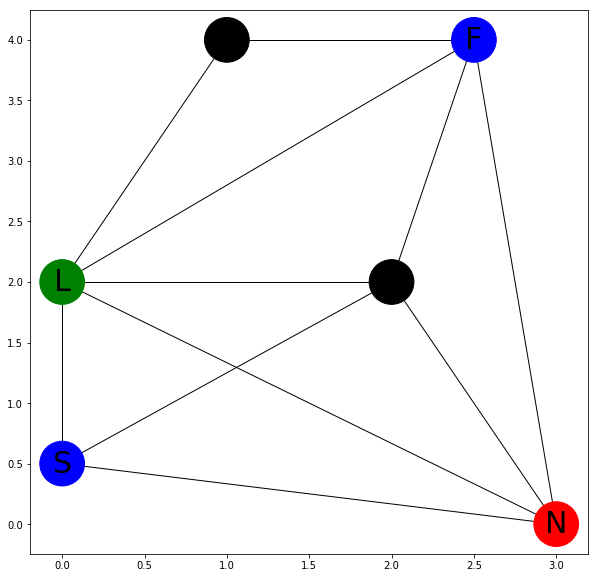

In [58]:
pos = {'B':(2,2), 'E':(1,4), 'F':(2.5, 4), 'L':(0,2), 'N':(3, 0), 'S':(0, 0.5)}
color = graph_coloring(graph1, color_table)
print(color)
draw_colored_graph(graph1, pos=pos, color=list(color.values()))

#### 상기 [그림 1]은 planar graph 가 아니어서,  4 color 이하로 색칠할 수있다는 사실이 가 적용되지 않습니다. 
#### 다음 [그림 7]와 같은 지도에 대해서 graph coloring 을 적용해봅시다.
![Altext](fig12-7.png)

#### 교과서에서 배운 바대로 [그림 7]에 대해 다음과 같이 dual graph 를 구한 후에 dual graph 의 그래프 표현을 구한 후에  상기 graph coloring 알고리즘을 적용해 봅시다.  
![Altext](fig12-8.png)

In [168]:
dual_graph = {'a': ['b', 'c', 'd', 'e'],
       'b': ['a', 'c', 'd'],
       'c': ['a', 'b', 'd'],
       'd': ['a', 'b', 'c', 'e', 'f', 'g'],
       'e': ['a', 'd', 'f', 'g'],
       'f': ['d', 'e', 'g'],
       'g': ['d', 'e', 'f']   
             }
dual_graph

{'a': ['b', 'c', 'd', 'e'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'd'],
 'd': ['a', 'b', 'c', 'e', 'f', 'g'],
 'e': ['a', 'd', 'f', 'g'],
 'f': ['d', 'e', 'g'],
 'g': ['d', 'e', 'f']}

In [171]:
color_table2 = ['Red', 'Blue', 'Green', 'Yellow', 'Violet']
graph_coloring(dual_graph, color_table2)

{'a': 'Red',
 'b': 'Blue',
 'c': 'Green',
 'd': 'Yellow',
 'e': 'Blue',
 'f': 'Red',
 'g': 'Green'}

#### 실제로 위에서 만든 함수를 이용하여 직접 그래프를 그려 봅시다.

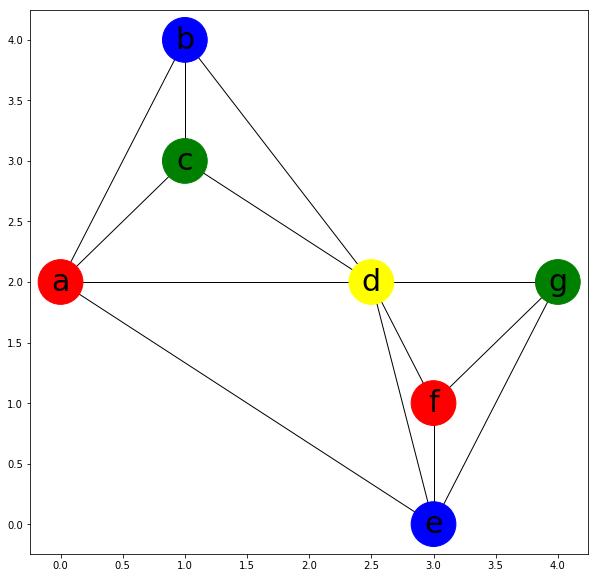

In [173]:
color = graph_coloring(dual_graph, color_table2)
pos = {'a':(0, 2),'b':(1, 4),'c':(1, 3),'d':(2.5, 2),'e':(3, 0),'f':(3, 1),'g':(4, 2)}
draw_colored_graph(dual_graph, pos=pos, color=list(color.values()))

#### 상기 graph coloring 알고리즘을 적용한 결과는 다음 [그림 9] 와 같습니다.
![Altext](fig12-9.png)

###  NetworkX 패키지 활용 그래프 컬러링 

In [177]:
color_table = ['Black', 'Blue', 'Green', 'Red', 'Violet', 'Yellow']
d = nx.coloring.greedy_color(G1, strategy="largest_first")
d

{'L': 0, 'B': 1, 'F': 2, 'N': 3, 'S': 2, 'E': 1}

In [ ]:
{'B': 'Red', 'E': 'Red', 'F': 'Blue', 'L': 'Green', 'N': 'Yellow', 'S': 'Blue'}

## 5. Bipartite Graph 여부 

### 그래프가 Bipartite인지 확인하는 알고리즘 :
#### 한 가지 접근 방식은  $m$ 채색 문제를 사용하여 그래프가 2(즉, $m=2$)색으로 채색이 가능한지 여부를 확인하는 것입니다.
#### 다음은 주어진 그래프가 BFS (Breadth First Search)를 사용하여 Birpartite인지 여부를 확인하는 간단한 알고리즘입니다.
#### 1. 시작 노드에 빨강색(또는 1)을 할당합니다 (세트 U에 넣음).
##### 2. 해당 노드의 인접노드들에   파랑색(또는  0 ) 을 할당합니다 (세트 V에 넣음).
##### 3.  상기 인접노드들의 인접노드들을 빨강색(또는 1)을  할당합니다 (세트 U에 넣음).
##### 4. 이런 방식으로, m = 2 인 m 방향 채색 문제의 모든 제약 조건을 충족하도록 모든  노드에 색상을 할당합니다.
##### 5. 색상을 할당하는 동안 현재  노드와 같은 색이 할당된 인접노드를 발견하게  되면 그래프는  2개의  색상으로 채색 할 수 없습니다 (즉,  그래프가 Bipartite가 아님).

In [85]:
def isBipartite(graph): # graph 는   해당 그래프의 인접목록 dictionary   
    V=[]                                           # V=해당 그래프의 노드 리스트 
    for key in graph:                              #인접목록 그래프 표현으로부터  그래프 노드 목록 생성 
        V.append(key)
    V.sort()                                       # 추후 처리를 위해 그래프 노드들을 정렬          
    colorArr = [-1]*len(graph)                     # 노드들의 색상 정보 목록 생성(-1 로 초기화)        
    colorArr[0] = 1                                # 시작노드에 첫번째 색상(1) 할당         
    explored=[]                                    # 탐색된 노드 목록 생성    
    queue = []                                     # 너비우선탐색 을 위한, 탐색할 노드 큐(FIFO) 생성  
    queue.append(V[0])                             # 탐색할 큐에 시작 노드 삽입 

        
    while queue:  #  탐색할 큐에 노드가 있는 한 계속 수행  
        u = queue.pop(0)        
        i=-1
        j=V.index(u)
        
        # Return false if there is a self-loop         
        for node in graph[u]:           
            if node not in explored:               
                i=V.index(node)

                if  colorArr[i]==colorArr[j]:     #해당 노드의 색상(colorArr[j])이 인접노드의 색상(colorArr[i])과 같으면, Bipartite 아님  
                    print("Node coloring: {}={}".format(V, colorArr))                  
                    return False
                else:                            #해당 노드의 인접 노드드들의 색상을 할당 
                    if colorArr[i]==-1: 
                        colorArr[i]=1-colorArr[j]                                          
                        queue.append(node)      #색상이 할당된 인접노드는 다음 이의 인접노드들에 대해 탐색해야 하므로, 탐색 목록에 등록                                
        if u not in explored:                   # 해당 노드가 이미 탐색된 것이 아니면, 탐색된 노드 목록에 등록
            explored.append(u)                         
    print("Node coloring: {}={}".format(V, colorArr))          
    return True  
 


#### 다음 [그림 10] 그래프가  'Bipartition' 이 가능한지에 대해 적용해 봅시다. 
![Alttext](fig12-10.png)

In [195]:
graph={'a': ['b', 'c'], 'b':['a', 'd'], 'c':['a', 'd'], 'd':['b', 'c']}
isBipartite(graph)

Node coloring: ['a', 'b', 'c', 'd']=[1, 0, 0, 1]


True

####  앞 [그림 1] 그래프가  'Bipartition' 이 가능한지에 대해 적용해 봅시다. 

In [196]:
graph = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N'],}
isBipartite(graph)

Node coloring: ['B', 'E', 'F', 'L', 'N', 'S']=[1, 1, 0, 0, 0, 0]


False

### networkx 패키지를 활용한 Graph 의 Bipartitioning  여부

In [83]:
import networkx as nx
G1=nx.Graph()
Nodes1=['A', 'B', 'C', 'D']
G1.add_nodes_from(Nodes1)
# adding a list of edges:
Edges= [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')] 
                  
G1.add_edges_from(Edges)
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges())
nx.is_bipartite(G1)

Nodes of graph: 
['A', 'B', 'C', 'D']
Edges of graph: 
[('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')]


True

In [84]:
import networkx as nx
G=nx.Graph()
Nodes=['S', 'B', 'L', 'N', 'E', 'F' ]
G.add_nodes_from(Nodes)

# adding a list of edges:
G.add_edges_from([('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), 
                   ('N', 'F'), ('E', 'F') ])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())
nx.is_bipartite(G)

Nodes of graph: 
['S', 'B', 'L', 'N', 'E', 'F']
Edges of graph: 
[('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), ('N', 'F'), ('E', 'F')]


False

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

### 실습 1. 
#### 너비우선 탐색 방법을 활용하여 주어진 그래프에서 주어진 시작 노드와 종단 노드간의최단 경로를 찾는 파이썬 함수를 코딩하여 보고, 이를 [그림 4]에 적용하여 보시오. 
#### 주어진 그래프 표현은 인접목록으로 주어진다고 가정함. 즉, [그림 4]의 그래프 표현은 

graph_w = {'S': [['B', 175], ['L', 125],['N', 320]],
             'B': [['F', 245], ['L', 115], ['N', 145], ['S', 175]],
             'L': [['B', 115], ['E', 645],['F', 220],['N', 260],['S', 125]],
             'N': [['B', 145], ['F', 385],['L', 260],['S', 320]],
             'E': [['F', 450],['L', 645]],
             'F': [['B', 245], ['E', 450],['N', 385]]} $


### 실습 2.
#### 주어진 그래프 표현이 인접행렬일 때,  그래프의 인접노드들을 다르게 색칠되는, 그래프의    노드들의 색상을 구하는 함수를 파이썬 함수로  코딩하고, 이를 [그림 8] 에 적용하여 보시오. 

### 실습 3. 
#### 주어진 그래프 표현이 인접 행렬로 주어지는 경우에, 그래프가 이분이 가능한 지(즉 그래프가 Bipartite graph 인지)를 판별하는 파이썬 함수를 작성하고, 이를  다음 [그림 10] 의 그래프와 [그림 1] 의 그래프에 적용하여 보시오.  